In [5]:
import pandas

ModuleNotFoundError: No module named 'pandas'

# Corrections Pandas
Nous allons apporter le document csv telquel dans pandas.

In [6]:
df = pandas.read_csv("naissance_2017.csv", index_col=0)

NameError: name 'pandas' is not defined

In [3]:
df.head()

NameError: name 'df' is not defined

Comme le montre la ligne suivante, les données ne sont pas très propre. 
Nous allons avoir besoin de la colonne depnais, il faut donc la nettoyer avant. 

In [4]:
df.depnais.unique()

NameError: name 'df' is not defined

Pour la nettoyer, on va simplement transformer les chaînes de caractères qui represente des nombres en nombre, en laissant les autres valeurs tranquilles. 

In [1]:
df["depnais"].apply(lambda e:int(e) if isinstance(e, str) and e.strip().isnumeric() else e)

NameError: name 'df' is not defined

In [107]:
df["depnais"] = df["depnais"].apply(lambda e:int(e) if isinstance(e, str) and e.strip().isnumeric() else e)
df["depnais"].unique() # Tout c'est bien passé

array([1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42,
       44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 971, 972,
       973, 974, 976, 4, ' 2B', 18, 70, 43, 48, 52, 10, ' 2A', 41, 24, 65,
       nan], dtype=object)

In [109]:
nombre_naissance = len(df) 
print("Nombre de naissance en 2017:", nombre_naissance)

Nombre de naissance en 2017: 769554


On va se limiter à certains champs d'intérêt pour la suite. On va donc regrouper les lignes qui ont la même valeur pour ces champs en ajoutant une colonne qui compte le nombre d'occurrence. 

In [115]:
naissances = df.groupby(["sexe", "mnais", "depnais", "agepere", "agemere", "tudom"]).size()
naissances.head()

sexe  mnais  depnais  agepere  agemere  tudom
1.0   1.0    1        17.0     17.0     5.0      1
                      23.0     21.0     0.0      1
                                        5.0      1
                               22.0     4.0      1
                      24.0     21.0     0.0      1
dtype: int64

On voit que les colonnes que l'on a regrouper forme un multi-index. Il faut retransformer cette série en *dataframe*.

In [116]:
naissances = naissances.reset_index(name="Count")
naissances.head()

sexe  mnais depnais  agepere  agemere  tudom  Count
0   1.0    1.0       1     17.0     17.0    5.0      1
1   1.0    1.0       1     23.0     21.0    0.0      1
2   1.0    1.0       1     23.0     21.0    5.0      1
3   1.0    1.0       1     23.0     22.0    4.0      1
4   1.0    1.0       1     24.0     21.0    0.0      1

# Les tableaux croisés (pivot table)

On va utiliser les tableaux croisés pour obtenir des informations pertinentes pour l'analyse de données. Dans un premier temps, si on souhaite analyser la saisonnalité des naissances en fonction du sexe.

In [122]:
naissances.pivot_table("Count", columns="sexe", index="mnais", aggfunc=sum)

sexe     1.0    2.0
mnais              
1.0    32632  30747
2.0    29585  28325
3.0    31929  30092
4.0    30990  29672
5.0    33446  32052
6.0    32474  30668
7.0    34996  33422
8.0    34703  33210
9.0    33126  31926
10.0   34373  32979
11.0   32744  31304
12.0   32796  31362

Il est bien plus parlant de faire des courbes. Pandas est très pratique pour ça: 

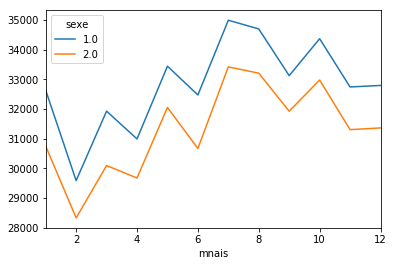

In [124]:
naissances.pivot_table("Count", columns="sexe", index="mnais", aggfunc=sum).plot()

Sans surprise, il y a peu de différence entre fille et garçon mais une saisonnalité importante. 
## Analyse par départements.
Il y a beaucoup de département, ce qui complique un peu l'analyse.
Réalisons le tableau croisé entre l'age du père et le département de naissance. 

In [140]:
naissances.pivot_table("Count", index="agemere", columns="depnais", aggfunc=sum).fillna(0)

depnais      1      2      3      4      5      6      7      8     9     10  \
agemere                                                                        
17.0       6.0   42.0   17.0    2.0    1.0   23.0    8.0   15.0   3.0   10.0   
18.0       8.0   28.0   25.0    8.0    3.0   28.0    7.0   19.0   5.0   16.0   
19.0      29.0   76.0   41.0    8.0    6.0   49.0   17.0   25.0   8.0   29.0   
20.0      45.0  113.0   54.0   16.0   12.0  110.0   16.0   49.0  24.0   71.0   
21.0      62.0  157.0   56.0   23.0   12.0  184.0   31.0   51.0  21.0   65.0   
22.0      81.0  171.0   83.0   29.0   23.0  203.0   72.0   73.0  23.0   86.0   
23.0     100.0  204.0   89.0   33.0   31.0  235.0   60.0   76.0  32.0  103.0   
24.0     120.0  226.0  137.0   30.0   28.0  378.0   87.0   73.0  47.0  133.0   
25.0     202.0  272.0  161.0   56.0   44.0  497.0  124.0  114.0  49.0  149.0   
26.0     203.0  325.0  177.0   56.0   58.0  527.0  156.0  120.0  66.0  190.0   
27.0     234.0  310.0  224.0   67.0   76.0  673.0  157.0  129.0  61.0  223.0   
28.0     296.0  400.0  233.0   72.0   99.0  783.0  198.0  162.0  73.0  219.0   
29.0     292.0  357.0  210.0   69.0   88.0  845.0  202.0  165.0  88.0  218.0   
30.0     296.0  365.0  254.0   83.0   88.0  908.0  193.0  156.0  82.0  197.0   
31.0     254.0  340.0  206.0  100.0  111.0  924.0  200.0  137.0  94.0  240.0   
32.0     253.0  267.0  184.0   90.0  110.0  911.0  195.0  117.0  79.0  180.0   
33.0     199.0  307.0  169.0   80.0   92.0  820.0  156.0  124.0  70.0  170.0   
34.0     221.0  265.0  152.0   64.0   71.0  800.0  145.0   90.0  76.0  123.0   
35.0     200.0  193.0  141.0   47.0   77.0  723.0  137.0   71.0  75.0  138.0   
36.0     175.0  185.0  128.0   48.0   65.0  602.0  109.0   60.0  55.0  108.0   
37.0     133.0  135.0  120.0   46.0   64.0  528.0  112.0   61.0  40.0  107.0   
38.0     106.0  132.0   75.0   28.0   43.0  453.0   78.0   44.0  34.0   75.0   
39.0      66.0   99.0   67.0   26.0   30.0  341.0   55.0   34.0  26.0   58.0   
40.0      55.0   73.0   35.0   21.0   19.0  263.0   41.0   32.0  27.0   36.0   
41.0      32.0   44.0   24.0    9.0   21.0  181.0   30.0   18.0   8.0   31.0   
42.0      25.0   49.0   38.0   10.0   14.0  133.0   19.0    8.0  10.0   21.0   
43.0      12.0   22.0   11.0    8.0    5.0   97.0   17.0    7.0   3.0   21.0   
44.0       8.0   14.0    8.0    3.0    6.0   62.0   10.0    1.0   1.0   11.0   
45.0       4.0    7.0    6.0    0.0    7.0   36.0    3.0    1.0   3.0    4.0   
46.0       5.0    5.0   11.0    2.0    1.0   39.0    5.0    2.0   1.0    3.0   

depnais  ...      93      94      95    971    972    973    974    976  \
agemere  ...                                                              
17.0     ...    83.0    48.0    52.0   56.0   43.0  380.0  236.0  335.0   
18.0     ...    82.0    33.0    36.0   43.0   50.0  259.0  208.0  255.0   
19.0     ...   176.0    77.0    96.0   69.0   84.0  285.0  336.0  329.0   
20.0     ...   283.0   138.0   166.0   99.0   92.0  326.0  491.0  340.0   
21.0     ...   406.0   233.0   240.0  104.0  115.0  363.0  532.0  451.0   
22.0     ...   544.0   304.0   346.0  153.0  128.0  319.0  592.0  435.0   
23.0     ...   771.0   445.0   446.0  156.0  148.0  324.0  591.0  463.0   
24.0     ...   902.0   535.0   548.0  171.0  142.0  372.0  659.0  549.0   
25.0     ...  1083.0   706.0   776.0  181.0  179.0  377.0  733.0  474.0   
26.0     ...  1319.0   938.0   932.0  179.0  190.0  390.0  758.0  467.0   
27.0     ...  1461.0  1175.0  1189.0  245.0  186.0  405.0  763.0  520.0   
28.0     ...  1564.0  1295.0  1271.0  238.0  186.0  424.0  805.0  439.0   
29.0     ...  1686.0  1407.0  1411.0  239.0  203.0  409.0  811.0  499.0   
30.0     ...  1702.0  1530.0  1470.0  219.0  204.0  367.0  766.0  471.0   
31.0     ...  1707.0  1568.0  1492.0  227.0  211.0  337.0  764.0  445.0   
32.0     ...  1660.0  1480.0  1367.0  221.0  191.0  400.0  684.0  407.0   
33.0     ...  1531.0  1393.0  1265.0  212.0  198.0  392.0  672.0  389.0   
34.0     ...  

Il y a trop de données pour être affiché correctement. On peut identifier les départements avec trop peu de naissances pour que ce soit significatif. 

In [308]:
depnais = naissances.groupby(by="depnais").agg("sum")["Count"]
depnais_important = depnais[depnais>nombre_naissance/30].index
depnais_important # Contient les départements qui ont au moins 3% des naissances.

Index([13, 59, 69, 75], dtype='object', name='depnais')

## Analyse age de la mère

In [319]:
agemere = naissances.pivot_table("Count", index="agemere", columns="depnais", aggfunc=sum).fillna(0)[depnais_important]

On peut normaliser les distributions pour pouvoir les comparer effectivement. 

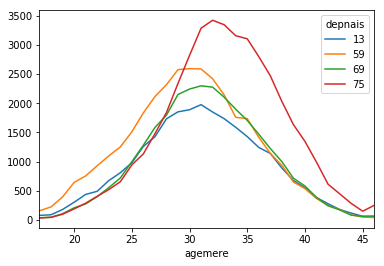

In [320]:
agemere.plot() # Plot déséquilibré. Il faut renormaliser la distribution

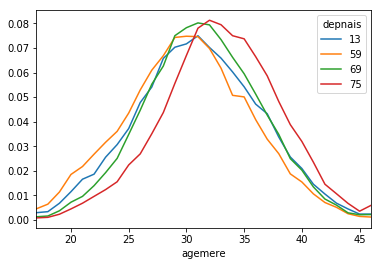

In [323]:
(agemere/agemere.sum()).plot()

## Age père
On recommence mais avec l'age du père.

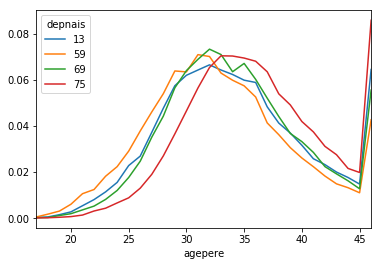

In [324]:
agepere = naissances.pivot_table("Count", index="agepere", columns="depnais", aggfunc=sum).fillna(0)[depnais_important]
(agepere/agepere.sum()).plot()

# Agrégé l'age moyen des parents

In [325]:
naissances["ages_parents"] = (naissances.agepere+naissance.agemere)/2

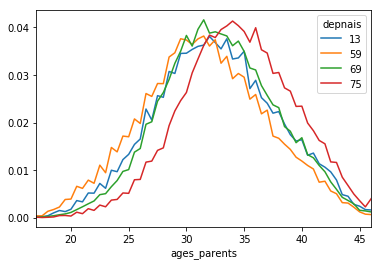

In [327]:
ageparents = naissances.pivot_table("Count", index="ages_parents", columns="depnais", aggfunc=sum).fillna(0)[depnais_important]
(ageparents/ageparents.sum()).plot()

# Age de la mère et mois de naissance


In [350]:
agemere_mois = naissances.pivot_table("Count", index="agemere", columns="mnais", aggfunc=sum)

In [370]:
agemere_mois.style.background_gradient(cmap='Blues')

# Tableau croisé projetable
Jusqu'à présent nous avons vu comment obtenir un tableau croisé. 
Mais il peut être utile de projeter le tableau en fonction de différent points de vu.
Pour ça, il est utile d'automatiser la production du tableau de croisé en fonction de la 
dataframe initial, puis de modifier cette dataframe en fonction des projections qui nous intéressent. 

In [377]:
def age_mere_mois(df):
    return df.pivot_table("Count", index="agemere", columns="mnais", aggfunc=sum).fillna(0).style.background_gradient(cmap='Blues')
    

In [380]:
age_mere_mois(naissances[naissance.depnais==75]) # à Paris seulement

In [382]:
age_mere_mois(naissances[naissance.depnais==59]) # Dans le nord
